### Recipe recommender based on similar ingredients

## Data Analysis

In [1]:
import pandas as pd
import string
import nltk
import re

In [2]:
recipe_ingredients = pd.read_csv('./data/core-data_recipe.csv')
recipe_ingredients = recipe_ingredients.drop(columns=["image_url", "cooking_directions","nutritions"])
recipe_ingredients.head()

,recipe_id,recipe_name,ingredients
0,240488,"Pork Loin, Apples, and Sauerkraut",sauerkraut drained^Granny Smith apples sliced^...
1,218939,Foolproof Rosemary Chicken Wings,chicken wings^sprigs rosemary^head garlic^oliv...
2,87211,Chicken Pesto Paninis,focaccia bread quartered^prepared basil pesto^...
3,245714,Potato Bacon Pizza,red potatoes^strips bacon^Sauce:^heavy whippin...
4,218545,Latin-Inspired Spicy Cream Chicken Stew,skinless boneless chicken breast halves^diced ...


In [3]:
def ingredients_parser(recipe):

    def remove_punctuations(text):
        for char in string.punctuation:
            text = text.replace(char, '')
        return text
    
    parsed_str = " ".join(recipe.split("^"))
    parsed_str = parsed_str.lower()
    # Remove text between ()
    parsed_str = re.sub("\(.*?\)","",parsed_str)
    parsed_str = remove_punctuations(parsed_str)
    stopwords = nltk.corpus.stopwords.words("english")

    ingredients_sw = [
        "salt", "ground", "sugar", "chopped", "white", "oil", "fresh", "black", "taste", "water", "allpurpose", 
        "dried", "red", "green", "baking", "extract", "shredded", "sliced", "large", "vegetable", "brown", "diced", "grated", 
        "drained", "dry", "minced", "frozen", "mix", "soda", "fluid", "small", "cut", "skinless", "boneless", "seasoning", "cooked", 
        "hot", "cold", "packed", "soup", "ounce", "finely", "peeled", "condensed", "confectioners", "freshly", "heavy", "inch", "medium", 
        "sweet", "beaten", "prepared", "divided", "rinsed", "unsweetened", "cooking", "seeds", "dressing", "uncooked", "cubed", "ice",
        "light", "pieces", "shortening", "thinly", "rasins", "head", "wheat", "halved", "unsalted", "instant", "ounces", "topping", "crumbled", 
        "spray", "melted", "flavored", "whipped", "stock", "lean", "whipping", "frying", "pitted", "seasoned", "sweetened", "warm", "sea", "extravirgin", "toasted",
        "slices", "trimmed", "rolled", "flaked", "leaf", "mashed", "plain", "evaporated", "food", "roast", "bottle", "halfandhalf", "chunks", "smoked", "boiling",
        "extra", "allspice", "seeded", "liquid", "thick", "garnish", "blend", "quartered", "refrigerated", "distilled", "roasted", "spice", "monterey", "softened",
        "italianstyle", "dough", "squares", "weed", "round", "removed", "virgin", "lengthwise", "whole", "lowfat", "strips", "room", "bag", "thin",
        "room", "temperature", "half", "concentrate", "torn", "hearts", "blue", "coloring", "thighs", "slivered", "undrained", "recipe", "fatfree", 
        "unbaked", "fat", "nonfat", "long", "greek", "cracked", "creme", "separated", "american", "broken", "smoked", "shell", "envelope", "dates", "powered",
        "stuffing", "preserves", "rounds", "de", "squeezed", "quickcooking", "double", "crispy", "deep", "fine", "refried", "new", "and", "to", "into", "for",
        "of", "with", "in", "baby", "a", "as", "quick", "raw", "at", "soft", "old", "very", "plus", "free", "ears", "such", "hair", "single",
        "button", "top", "cod", "low", "leaves"
    ]

    parsed_str = " ".join([word for word in parsed_str.split() if word not in stopwords])
    parsed_str = " ".join([word for word in parsed_str.split() if word not in ingredients_sw])
    return parsed_str

In [4]:
recipe_ingredients["ingredients_parsed"] = recipe_ingredients["ingredients"].apply(ingredients_parser)

In [5]:
recipe_ingredients.head()

,recipe_id,recipe_name,ingredients,ingredients_parsed
0,240488,"Pork Loin, Apples, and Sauerkraut",sauerkraut drained^Granny Smith apples sliced^...,sauerkraut granny smith apples onion caraway a...
1,218939,Foolproof Rosemary Chicken Wings,chicken wings^sprigs rosemary^head garlic^oliv...,chicken wings sprigs rosemary garlic olive lem...
2,87211,Chicken Pesto Paninis,focaccia bread quartered^prepared basil pesto^...,focaccia bread basil pesto chicken bell pepper...
3,245714,Potato Bacon Pizza,red potatoes^strips bacon^Sauce:^heavy whippin...,potatoes bacon sauce cream butter garlic parme...
4,218545,Latin-Inspired Spicy Cream Chicken Stew,skinless boneless chicken breast halves^diced ...,chicken breast halves tomatoes salsa beans pin...


In [6]:
recipe_ingredients.to_csv("./data/parsed_ds.csv", index=False)

In [8]:
vocabulary1 = nltk.FreqDist()

for ingredients in recipe_ingredients["ingredients_parsed"]:
    ingredients = ingredients.split()
    vocabulary1.update(ingredients)

From here we can choose which words we consider irrelevant for ingredients such as:
 * salt
 * fresh
 * dried
 * green
 * black
 * taste
 * ...

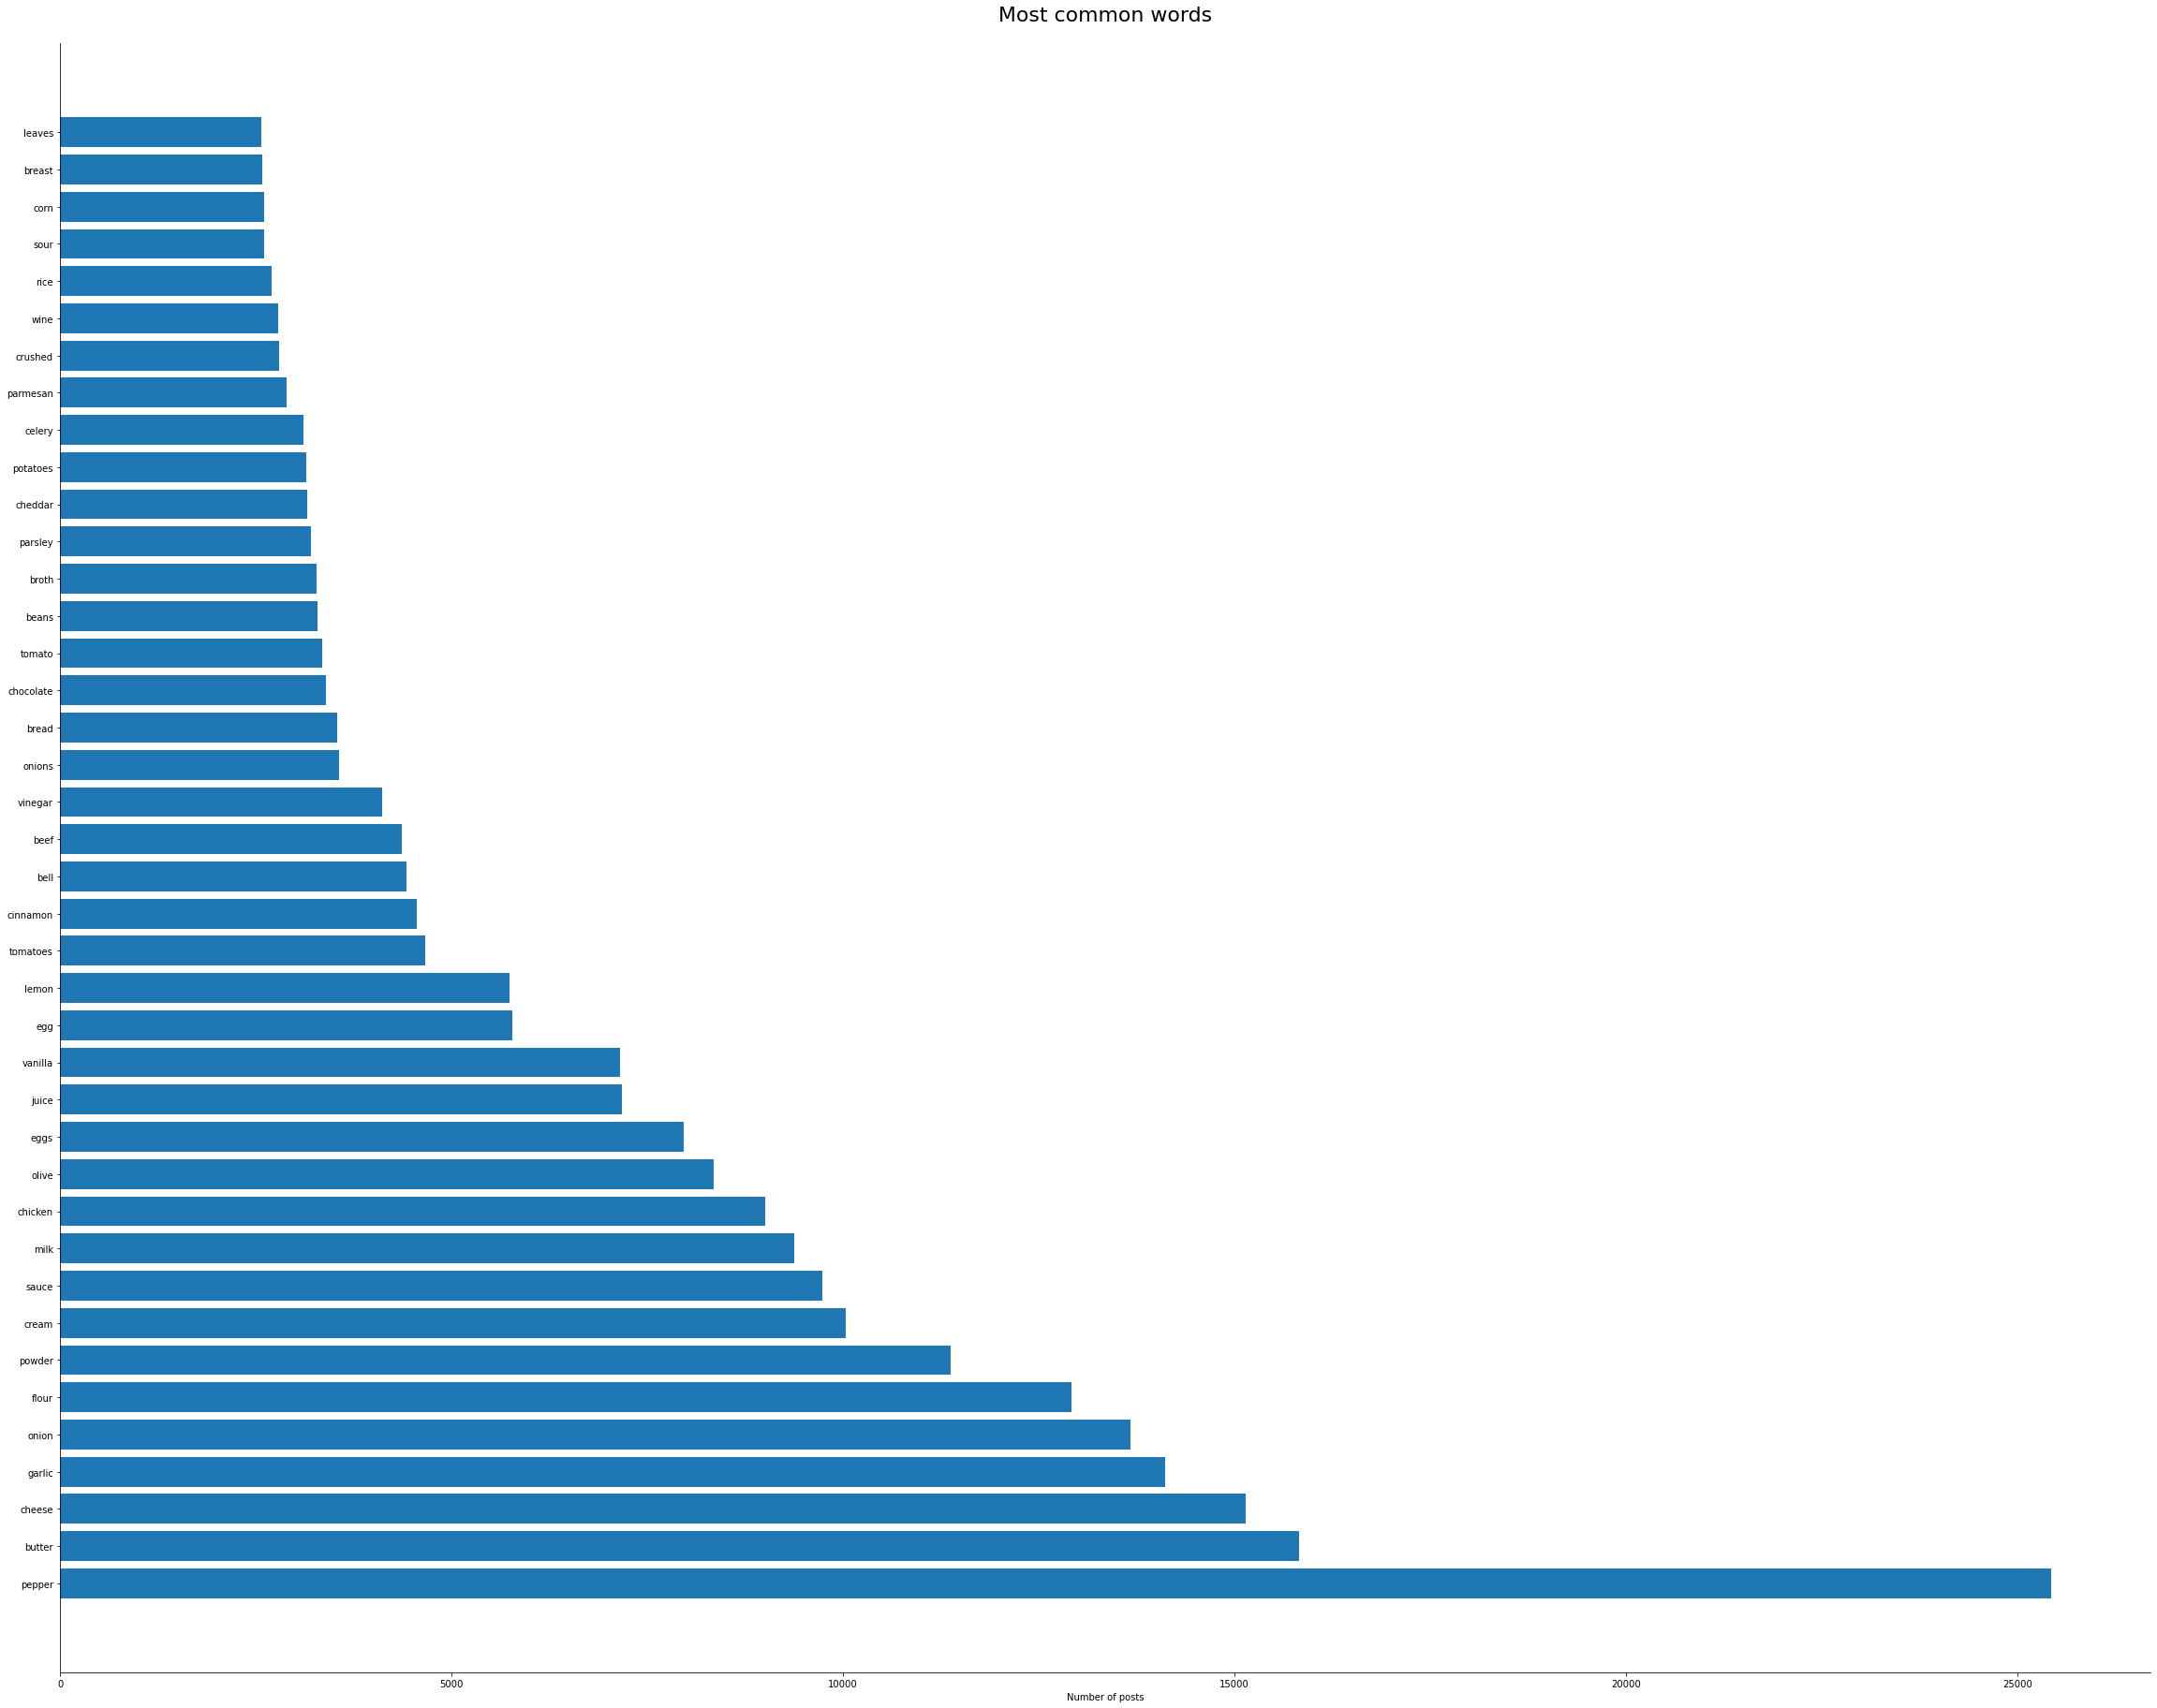

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,32))
plt.barh([x[0] for x in vocabulary1.most_common(40)],[x[1] for x in vocabulary1.most_common(40)], label='Frequency')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Number of posts')
plt.title('Most common words',fontsize=22,pad=24)
plt.show()